In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
try:
        data = pd.read_csv("train.csv")
        print(data.describe(),"\n")
except Exception as e:
        print("Error! data not  found.")

            pixel_0      pixel_1       pixel_2       pixel_3       pixel_4  \
count  50000.000000  50000.00000  50000.000000  50000.000000  50000.000000   
mean     130.710740    130.14036    131.050440    131.568860    132.184700   
std       73.412873     72.44259     72.240546     72.016555     71.714551   
min        0.000000      0.00000      0.000000      0.000000      0.000000   
25%       71.000000     71.00000     73.000000     73.000000     75.000000   
50%      128.000000    127.00000    129.000000    130.000000    130.000000   
75%      189.000000    188.00000    188.000000    188.000000    189.000000   
max      255.000000    255.00000    255.000000    255.000000    255.000000   

            pixel_5       pixel_6       pixel_7       pixel_8      pixel_9  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.00000   
mean     132.851840    133.371540    133.890920    134.485040    134.93260   
std       71.537505     71.353558     71.281237     71.071698  

In [3]:
X = data.drop(columns=['label'])
y = data['label']
y

0        6
1        9
2        9
3        4
4        1
        ..
49995    2
49996    6
49997    9
49998    1
49999    1
Name: label, Length: 50000, dtype: int64

In [4]:
def check_missing_values():
    missing = X.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        print(missing)
    else:
        print("\n No Missing Data \n")

def detect_outliers(z_thresh=3.29):
    for col in X.columns:
        if pd.api.types.is_numeric_dtype(X[col]):
            z_scores = zscore(X[col])
            outliers = (abs(z_scores) > z_thresh)
            num_outliers = outliers.sum()
            # rint(f"col '{col}': {num_outliers} outlier found.")
            #filtered_data = data[np.abs(z_scores) <= z_thresh]
def normal(X):
    return X.reshape(X.shape[0], -1).astype(np.float32) / 255.0

def plot_distributions():
    for col in X_train.columns:
        if pd.api.types.is_numeric_dtype(X_train[col]):
            plt.figure(figsize=(6,4))
            sns.histplot(X_train[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
        else:
          print("\n",col, "is not numeric")

In [5]:
X = X.to_numpy().reshape(X.shape[0], -1)
y = y.to_numpy()
X = normal(X)
X

array([[0.23137255, 0.16862746, 0.19607843, ..., 0.54901963, 0.32941177,
        0.28235295],
       [0.6039216 , 0.49411765, 0.4117647 , ..., 0.54509807, 0.5568628 ,
        0.5647059 ],
       [1.        , 0.99215686, 0.99215686, ..., 0.3254902 , 0.3254902 ,
        0.32941177],
       ...,
       [0.13725491, 0.15686275, 0.16470589, ..., 0.3019608 , 0.25882354,
        0.19607843],
       [0.7411765 , 0.7294118 , 0.7254902 , ..., 0.6627451 , 0.67058825,
        0.67058825],
       [0.8980392 , 0.9254902 , 0.91764706, ..., 0.6784314 , 0.63529414,
        0.6313726 ]], dtype=float32)

In [6]:
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((y.shape[0], num_classes))
    one_hot[np.arange(y.shape[0]), y] = 1
    return one_hot

In [7]:
y = one_hot_encode(y, num_classes=10)


In [8]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
)
print(X_train)

[[0.13333334 0.14509805 0.17254902 ... 0.19215687 0.1882353  0.22745098]
 [0.35686275 0.37254903 0.36078432 ... 0.2901961  0.4745098  0.5254902 ]
 [0.8156863  0.7764706  0.6431373  ... 0.6392157  0.64705884 0.6156863 ]
 ...
 [0.41960785 0.49803922 0.45882353 ... 0.13333334 0.13333334 0.13333334]
 [1.         1.         1.         ... 0.21960784 0.23137255 0.23921569]
 [0.73333335 0.77254903 0.78431374 ... 0.37254903 0.40392157 0.41568628]]


In [9]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [10]:
def sigmoid_activation_function(z):
        return sigmoid(z) * (1 - sigmoid(z))

In [11]:
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

def he_initialization(shape):
    return np.random.randn(*shape) * np.sqrt(2. / shape[0])

In [12]:
class MomentumOptimizer:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = {}
    
    def update(self, params, grads):
        if not self.v:
            for key in params.keys():
                self.v[key] = np.zeros_like(params[key])
        
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] + self.lr * grads[key]
            params[key] -= self.v[key]

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [14]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [15]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    if len(y_pred.shape) == 1:
        y_pred = y_pred.reshape(-1, 1)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [16]:
class NeuralNetwork:
    def __init__(self, layer_dims, activations, initializer='he', optimizer='momentum', lr=0.01):
        self.params = {}
        self.activations = activations
        self.optimizer = optimizer
        self.lr=lr
        self.t = 1
        for l in range(1, len(layer_dims)):
            if initializer == 'he':
                self.params[f'W{l}'] = he_initialization((layer_dims[l-1], layer_dims[l]))
            elif initializer == 'xavier':
                self.params[f'W{l}'] = xavier_initialization((layer_dims[l-1], layer_dims[l]))
            self.params[f'b{l}'] = np.zeros((1, layer_dims[l]))
    
    def forward(self, X):
        caches = []
        A = X
        L = len(self.params) // 2
        
        for l in range(1, L):
            W = self.params[f'W{l}']
            b = self.params[f'b{l}']
            Z = np.dot(A, W) + b
            A = self._apply_activation(Z, self.activations[l-1])
            caches.append((Z, A))
        
        W = self.params[f'W{L}']
        b = self.params[f'b{L}']
        Z = np.dot(A, W) + b
        A = softmax(Z)
        caches.append((Z, A))
        
        return A, caches
    
    def _apply_activation(self, z, activation):
        if activation == 'relu':
            return relu(z)
        elif activation == 'sigmoid':
            return sigmoid(z)
        elif activation == 'tanh':
            return np.tanh(z)
    def _activation_derivative(self, z, activation_name):
            if activation_name == 'relu':
                return (z > 0).astype(float)
            elif activation_name == 'sigmoid':
                s = 1 / (1 + np.exp(-z))
                return s * (1 - s)  
            elif activation_name == 'tanh':
                return 1 - np.tanh(z)**2
            else:
                raise ValueError(f"error.")

    def train(self, X, y, epochs=100, lr=0.01, batch_size=32, val_data=None):
        history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
        self.lr=lr
        self.t = 1
        for epoch in range(epochs):
            for i in range(0, X.shape[0], batch_size):
                X_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                # Forward , backward
                A, caches = self.forward(X_batch)
                grads = self.backward(X_batch, y_batch, caches)
                
                self.update_params(grads, lr)
            
            
            train_loss, train_acc = self.evaluate(X, y)
            history['train_loss'].append(train_loss)
            history['train_acc'].append(train_acc)
            
            if val_data is not None:
                val_loss, val_acc = self.evaluate(val_data[0], val_data[1])
                history['val_loss'].append(val_loss)
                history['val_acc'].append(val_acc)
            
                print(f"Epoch {epoch}: Train Loss={train_loss:.4f}, Acc={train_acc:.4f} | Val Loss={val_loss:.4f}, Acc={val_acc:.4f}")
        
        return history
    def backward(self, X_batch, y_batch, caches):
    
        grads = {}
        L = len(self.params) // 2  
        m = X_batch.shape[0]  
        
       
        dZ = caches[-1][1] - y_batch  
        grads[f'dW{L}'] = np.dot(caches[-2][1].T, dZ) / m
        grads[f'db{L}'] = np.sum(dZ, axis=0, keepdims=True) / m
        
        
        for l in reversed(range(L-1)):
            dA = np.dot(dZ, self.params[f'W{l+2}'].T)
            dZ = dA * self._activation_derivative(caches[l][0], self.activations[l])
            grads[f'dW{l+1}'] = np.dot(caches[l-1][1].T if l > 0 else X_batch.T, dZ) / m
            grads[f'db{l+1}'] = np.sum(dZ, axis=0, keepdims=True) / m
        
        return grads
    def update_params(self, grads, lr=None, t=1):
        if lr is None:
            lr = self.lr 
    
        beta1 = 0.9
        beta2 = 0.999
        eps = 1e-8
    
        if self.optimizer == "momentum" and not hasattr(self, "velocities"):
            self.velocities = {}
            for key in self.params:
                self.velocities[key] = np.zeros_like(self.params[key])
    
        if self.optimizer == "adam" and not hasattr(self, "m"):
            self.t += 1
            self.m, self.v = {}, {}
            for key in self.params:
                self.m[key] = np.zeros_like(self.params[key])
                self.v[key] = np.zeros_like(self.params[key])
    
        for key in self.params:
            grad_key = "d" + key
            if grad_key not in grads:
                continue
    
            if self.optimizer == "sgd":
                self.params[key] -= lr * grads[grad_key]
    
            elif self.optimizer == "momentum":
                self.velocities[key] = 0.9 * self.velocities[key] - lr * grads[grad_key]
                self.params[key] += self.velocities[key]
    
            elif self.optimizer == "adam":
                self.m[key] = beta1 * self.m[key] + (1 - beta1) * grads[grad_key]
                self.v[key] = beta2 * self.v[key] + (1 - beta2) * (grads[grad_key] ** 2)
    
                m_hat = self.m[key] / (1 - beta1 ** t)
                v_hat = self.v[key] / (1 - beta2 ** t)
    
                self.params[key] -= lr * m_hat / (np.sqrt(v_hat) + eps)

    def evaluate(self, X, y):
        A, _ = self.forward(X)

        loss = self._compute_loss(y, A)

        predictions = np.argmax(A, axis=1)
        true_labels = np.argmax(y, axis=1)
        accuracy = np.mean(predictions == true_labels)
        
        return loss, accuracy

    def _compute_loss(self, y_true, y_pred):
        epsilon = 1e-12
        y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
        return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

In [17]:
results = {}        
opt_results = {}   

activations = {
    'ReLU': ['relu', 'softmax'],
    'Sigmoid': ['sigmoid', 'softmax']
}

for name, acts in activations.items():
    print(f"\nTraining with {name} activation...")
    nn = NeuralNetwork([3072, 128, 10], acts, initializer='he', optimizer='adam')
    history = nn.train(X_train, y_train, epochs=50, val_data=(X_test, y_test))
    results[name] = history 

optimizers = ['sgd', 'momentum', 'adam']

for opt in optimizers:
    print(f"\nTraining with {opt} optimizer...")
    nn = NeuralNetwork([3072, 128, 10], ['relu', 'softmax'], initializer='he', optimizer=opt)
    history = nn.train(X_train, y_train, epochs=50, val_data=(X_test, y_test))
    opt_results[opt] = history  



Training with ReLU activation...
Epoch 0: Train Loss=2.3029, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 1: Train Loss=2.3029, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 2: Train Loss=2.3029, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 3: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 4: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 5: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 6: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 7: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 8: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 9: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 10: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 11: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 12: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0994
Epoch 13: Train Loss=2.3028, Acc=0.1002 | Val Loss=2.3035, Acc=0.0

In [21]:
for name, acts in activations.items():
    print(f"\nTraining with {name} activation...")
    nn = NeuralNetwork([3072, 128, 10], acts, initializer='he', optimizer='sgd')
    history = nn.train(X_train, y_train, epochs=50, val_data=(X_test, y_test))
    results[name] = history 


Training with ReLU activation...
Epoch 0: Train Loss=1.7743, Acc=0.3720 | Val Loss=1.7819, Acc=0.3601
Epoch 1: Train Loss=1.6871, Acc=0.4067 | Val Loss=1.7039, Acc=0.3927
Epoch 2: Train Loss=1.6247, Acc=0.4313 | Val Loss=1.6498, Acc=0.4145
Epoch 3: Train Loss=1.5805, Acc=0.4475 | Val Loss=1.6149, Acc=0.4267
Epoch 4: Train Loss=1.5458, Acc=0.4591 | Val Loss=1.5867, Acc=0.4411
Epoch 5: Train Loss=1.5205, Acc=0.4665 | Val Loss=1.5709, Acc=0.4429
Epoch 6: Train Loss=1.4969, Acc=0.4753 | Val Loss=1.5543, Acc=0.4475
Epoch 7: Train Loss=1.4749, Acc=0.4835 | Val Loss=1.5414, Acc=0.4521
Epoch 8: Train Loss=1.4546, Acc=0.4894 | Val Loss=1.5285, Acc=0.4588
Epoch 9: Train Loss=1.4342, Acc=0.4968 | Val Loss=1.5154, Acc=0.4630
Epoch 10: Train Loss=1.4213, Acc=0.4986 | Val Loss=1.5106, Acc=0.4646
Epoch 11: Train Loss=1.4069, Acc=0.5043 | Val Loss=1.5035, Acc=0.4662
Epoch 12: Train Loss=1.3903, Acc=0.5093 | Val Loss=1.4954, Acc=0.4716
Epoch 13: Train Loss=1.3771, Acc=0.5136 | Val Loss=1.4896, Acc=0.4

In [18]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Train Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Train Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [19]:
def plot_training_histories(histories, labels):
    plt.figure(figsize=(14, 5))
    
    # Plot Loss
    plt.subplot(1, 2, 1)
    for history, label in zip(histories, labels):
        plt.plot(history['train_loss'], label=f'{label} - Train Loss')
        if 'val_loss' in history:
            plt.plot(history['val_loss'], linestyle='--', label=f'{label} - Val Loss')
    plt.title('Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot Accuracy
    plt.subplot(1, 2, 2)
    for history, label in zip(histories, labels):
        plt.plot(history['train_acc'], label=f'{label} - Train Acc')
        if 'val_acc' in history:
            plt.plot(history['val_acc'], linestyle='--', label=f'{label} - Val Acc')
    plt.title('Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


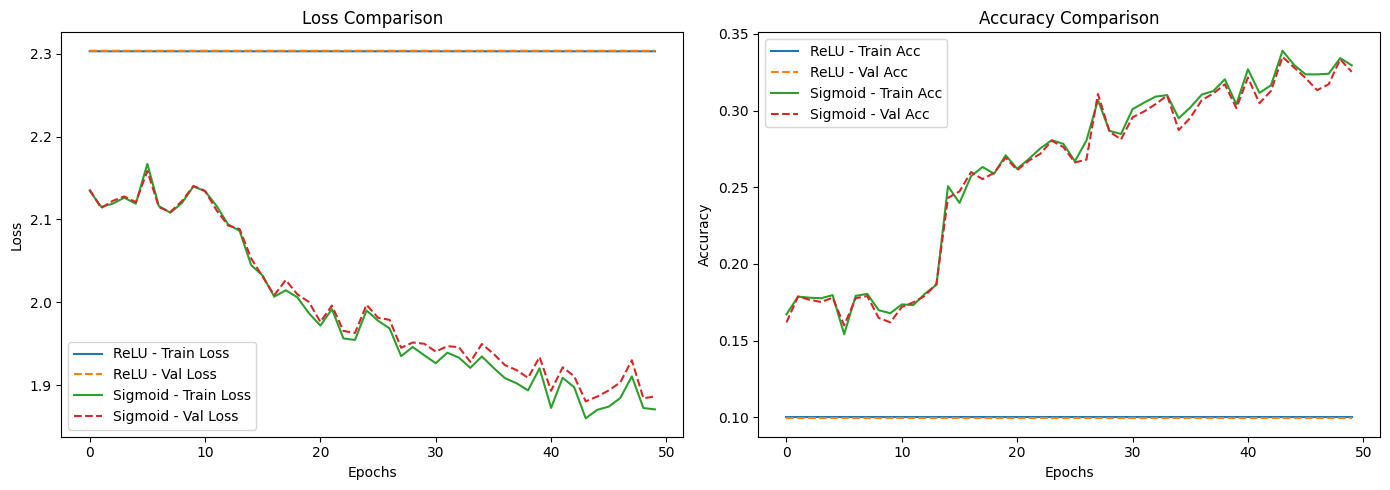

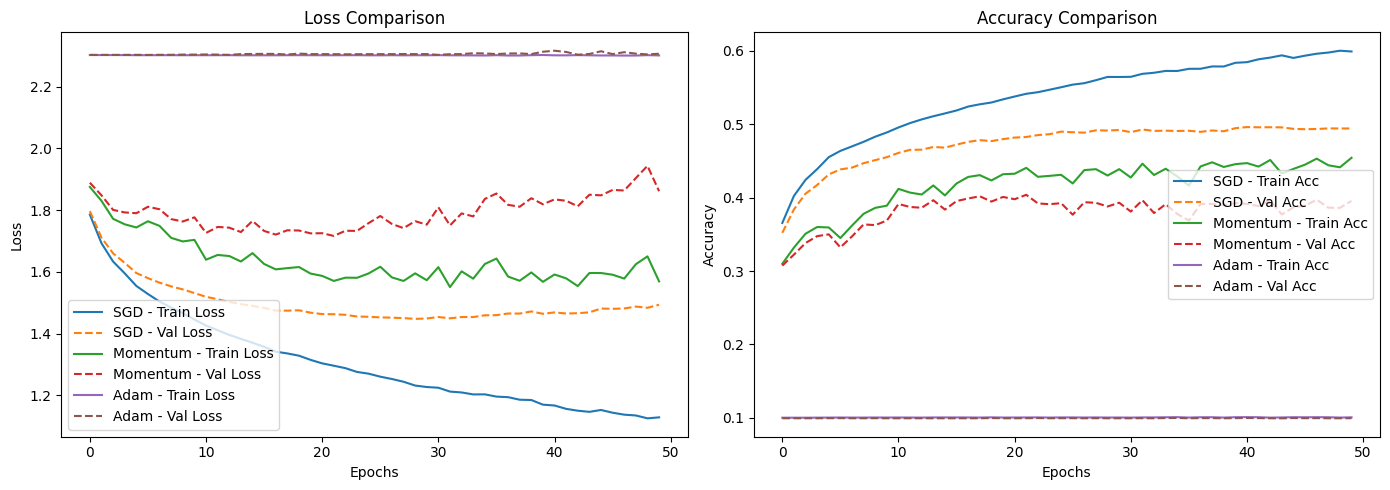

In [20]:
plot_training_histories(
    histories=[results['ReLU'], results['Sigmoid']],
    labels=['ReLU', 'Sigmoid']
)

plot_training_histories(
    histories=[opt_results['sgd'], opt_results['momentum'], opt_results['adam']],
    labels=['SGD', 'Momentum', 'Adam']
)

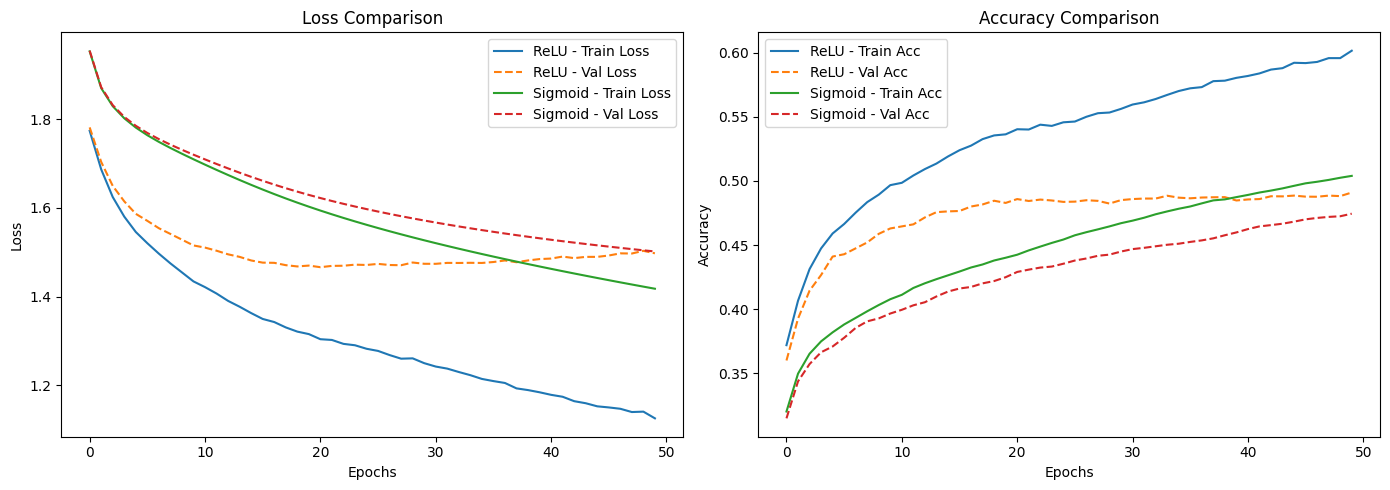

In [22]:
plot_training_histories(
    histories=[results['ReLU'], results['Sigmoid']],
    labels=['ReLU', 'Sigmoid']
)